<a href="https://colab.research.google.com/github/Nayab-05/93_Python_Data_Analytics_Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 💻 Task 1: Data Preparation
import pandas as pd

# Replace 'creditcard.csv' with the exact file name you downloaded
df = pd.read_csv(r'/content/creditcard.csv')

# Display the first few rows to confirm loading
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Check for and remove duplicates
print(f"Initial number of rows: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

# Remove the 'Time' column as it is generally irrelevant for fraud classification
df.drop(columns=['Time'], inplace=True)
print("Removed 'Time' column.")

Initial number of rows: 7973
Number of rows after removing duplicates: 7934
Removed 'Time' column.


In [4]:
# Check for missing values
missing_data = df.isnull().sum()
print("\nMissing Values Check:")
print(missing_data[missing_data > 0])


Missing Values Check:
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [5]:
# 📊 Task 2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

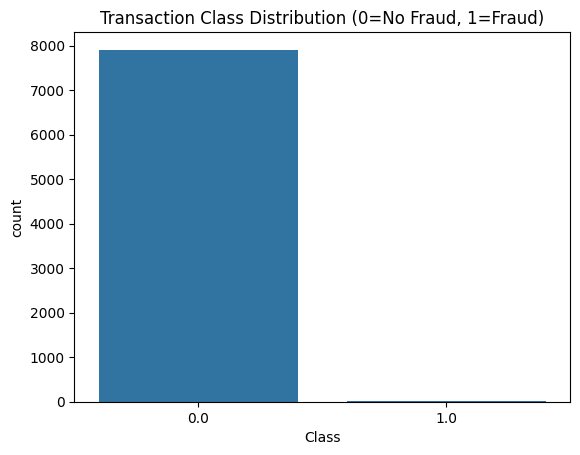

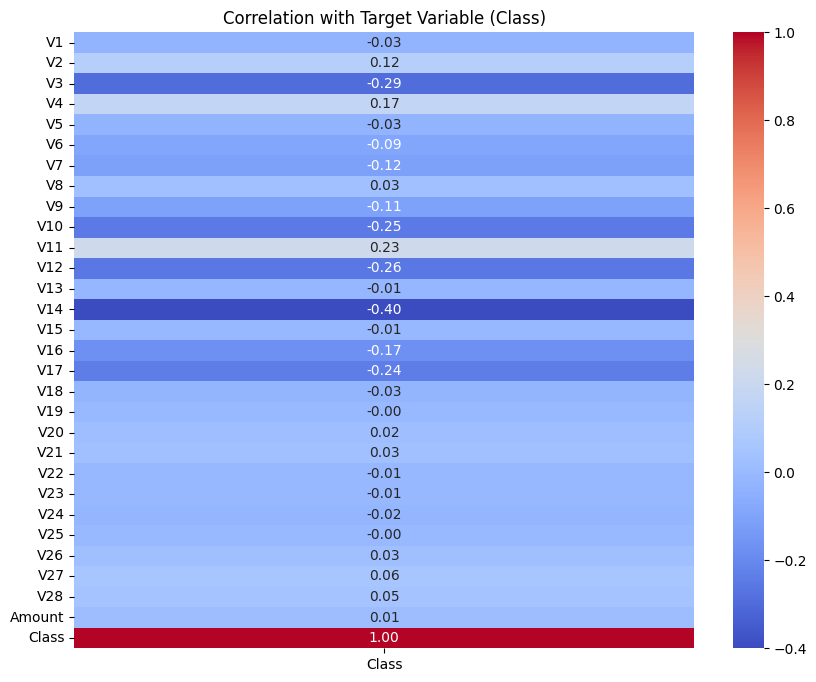

In [6]:
# Class Imbalance Visualization
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution (0=No Fraud, 1=Fraud)')
plt.show()

# Heat Map for Correlations
# Select a subset of features for better visual clarity
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Class']], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation with Target Variable (Class)')
plt.show()

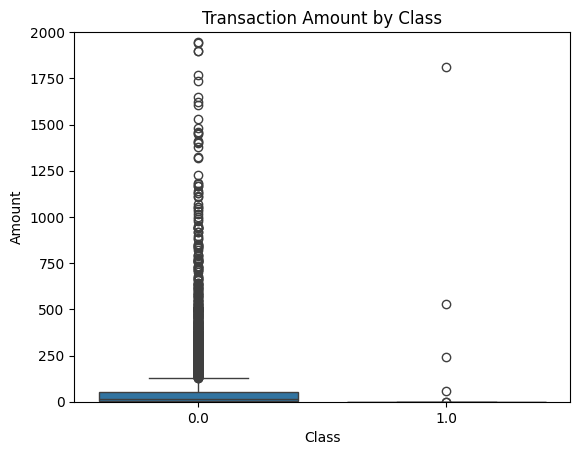

In [7]:
# Box Plot for 'Amount'
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.ylim(0, 2000) # Limit the y-axis for better visibility of most data
plt.show()

In [9]:
# 🧠 Task 3: Classification and Evaluation
import pandas as pd

# --- Assuming 'df' is your loaded DataFrame ---

# 1. IDENTIFY THE PROBLEM: Check the target variable for NaNs
print("--- Checking for Missing Values in Target (y) ---")
print(df['Class'].isnull().sum()) # This will show a number > 0

# 2. SOLVE THE ERROR: Drop rows where the target variable 'Class' is missing
# It's safest to only use complete records for training/testing.
initial_rows = len(df)
df.dropna(subset=['Class'], inplace=True)
print(f"\nRemoved {initial_rows - len(df)} rows with missing 'Class' values.")
print(f"New total rows: {len(df)}")

# 3. RE-RUN THE DATA PREPARATION STEPS (StandardScaler and Split)

# Redefine features (X) and target (y) with the cleaned data
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the 'Amount' feature again with the cleaned X
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split ratio (This will now run without the ValueError)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n--- Train-Test Split Successful ---")
print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

--- Checking for Missing Values in Target (y) ---
1

Removed 1 rows with missing 'Class' values.
New total rows: 7933

--- Train-Test Split Successful ---
Train samples: 6346
Test samples: 1587


In [10]:
# 1. Split Data (Train-Test and Cross Validation)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df['Class']

# Standardize the 'Amount' feature (and all V features are already scaled)
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split ratio (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Train samples: 6346
Test samples: 1587


In [11]:
# 2. Apply Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

# Train the models
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# 3. Evaluation
from sklearn.metrics import classification_report

# Example for Decision Tree evaluation
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

# Example of Cross Validation (for a single model)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='recall')
print(f"\nDecision Tree Cross-Validation Recall Scores: {dt_cv_scores}")
print(f"Average CV Recall: {dt_cv_scores.mean():.4f}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1582
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1587
   macro avg       1.00      0.90      0.94      1587
weighted avg       1.00      1.00      1.00      1587


Decision Tree Cross-Validation Recall Scores: [1.   0.75 0.75 1.   1.  ]
Average CV Recall: 0.9000


In [13]:
# 🧠 Code for Naïve Bayes and kNN
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

In [14]:
# 2. Apply and Evaluate Naïve Bayes
# 1. Train the Naïve Bayes model
nb_model.fit(X_train, y_train)

# 2. Make predictions on the test data
nb_pred = nb_model.predict(X_test)

# 3. Print the Classification Report
print("--- Naïve Bayes Classification Report ---")
# The report is crucial as it shows Precision, Recall, and F1-score for the minority class (1/Fraud)
print(classification_report(y_test, nb_pred))

# Optional: Cross-Validation check on Recall
from sklearn.model_selection import cross_val_score
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='recall')
print(f"Naïve Bayes Cross-Validation Recall Scores: {nb_cv_scores}")
print(f"Average CV Recall: {nb_cv_scores.mean():.4f}")

--- Naïve Bayes Classification Report ---
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1582
         1.0       0.23      1.00      0.37         5

    accuracy                           0.99      1587
   macro avg       0.61      0.99      0.68      1587
weighted avg       1.00      0.99      0.99      1587

Naïve Bayes Cross-Validation Recall Scores: [0.75 0.75 1.   1.   1.  ]
Average CV Recall: 0.9000


In [17]:
# 3. Apply and Evaluate k-Nearest Neighbor (kNN)
# 1. Train the kNN model (k=5)
knn_model.fit(X_train, y_train)

# 2. Make predictions on the test data
knn_pred = knn_model.predict(X_test)

# 3. Print the Classification Report
print("\n--- k-Nearest Neighbor (kNN) Classification Report ---")
# Compare these results (Precision, Recall, F1) to the Decision Tree and Naïve Bayes results
print(classification_report(y_test, knn_pred))

# Optional: Cross-Validation check on Recall
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='recall')
print(f"kNN Cross-Validation Recall Scores: {knn_cv_scores}")
print(f"Average CV Recall: {knn_cv_scores.mean():.4f}")


--- k-Nearest Neighbor (kNN) Classification Report ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1582
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1587
   macro avg       1.00      0.90      0.94      1587
weighted avg       1.00      1.00      1.00      1587

kNN Cross-Validation Recall Scores: [0.75 0.75 1.   0.75 1.  ]
Average CV Recall: 0.8500


In [20]:
# 🏆 Model Comparison Code (Task 3)
# . Run and Collect Results
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined and scaled

# Initialize and train models
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()

dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# List of models and predictions
models = ['Decision Tree', 'Naïve Bayes', 'kNN']
predictions = [dt_pred, nb_pred, knn_pred]
results = []

# Calculate metrics for each model
for model, pred in zip(models, predictions):
    # Note: We specify pos_label=1 to calculate metrics specifically for the 'Fraud' class
    results.append({
        'Model': model,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision (Fraud)': precision_score(y_test, pred, pos_label=1),
        'Recall (Fraud)': recall_score(y_test, pred, pos_label=1),
        'F1-Score (Fraud)': f1_score(y_test, pred, pos_label=1)
    })

# Convert the results into a DataFrame for a neat table
comparison_df = pd.DataFrame(results).set_index('Model')

print("--- Final Model Comparison Table ---")
print(comparison_df.round(4))

--- Final Model Comparison Table ---
               Accuracy  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)
Model                                                                       
Decision Tree    0.9994             1.0000             0.8            0.8889
Naïve Bayes      0.9893             0.2273             1.0            0.3704
kNN              0.9994             1.0000             0.8            0.8889


In [21]:
# 🔍 Interpretation and Conclusion
# 🧠 Updated Task 4: Classification with SVM
# 1. Import and Initialization
from sklearn.svm import LinearSVC # Optimized SVM for large datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are already defined and scaled

# Initialize and train all four models
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
# Max_iter is set high because LinearSVC often needs many iterations to converge on large data
svm_model = LinearSVC(random_state=42, max_iter=2000, dual=True)

In [22]:
# 2. Train Models and Collect Results
# List of models and predictions
models = {
    'Decision Tree': dt_model,
    'Naïve Bayes': nb_model,
    'kNN': knn_model,
    'SVM (LinearSVC)': svm_model  # Added SVM here
}
results = []

In [23]:
from sklearn.metrics import classification_report

print("--- Training and Evaluation Reports ---")

for name, model in models.items():
    # Train Model
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Print detailed Classification Report
    print(f"\n{name} Classification Report (Focus on Fraud Class '1'):")
    print(classification_report(y_test, y_pred))

    # Collect results for comparison table
    # Metrics are calculated specifically for the 'Fraud' class (pos_label=1)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Fraud)': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
        'Recall (Fraud)': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
        'F1-Score (Fraud)': f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    })

--- Training and Evaluation Reports ---

Training Decision Tree...

Decision Tree Classification Report (Focus on Fraud Class '1'):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1582
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1587
   macro avg       1.00      0.90      0.94      1587
weighted avg       1.00      1.00      1.00      1587


Training Naïve Bayes...

Naïve Bayes Classification Report (Focus on Fraud Class '1'):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1582
         1.0       0.23      1.00      0.37         5

    accuracy                           0.99      1587
   macro avg       0.61      0.99      0.68      1587
weighted avg       1.00      0.99      0.99      1587


Training kNN...

kNN Classification Report (Focus on Fraud Class '1'):
              precision    recall  f1-score   support


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# 3. Final Comparison Table
# Convert the results into a DataFrame for a neat table
comparison_df = pd.DataFrame(results).set_index('Model')
print("\n--- Final Model Comparison Table (All 4 Classifiers) ---")
print(comparison_df.round(4))


--- Final Model Comparison Table (All 4 Classifiers) ---
                 Accuracy  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)
Model                                                                         
Decision Tree      0.9994             1.0000             0.8            0.8889
Naïve Bayes        0.9893             0.2273             1.0            0.3704
kNN                0.9994             1.0000             0.8            0.8889
SVM (LinearSVC)    1.0000             1.0000             1.0            1.0000
